In [29]:
import json
import os
import matplotlib.pyplot as plt

In [7]:
imagenet100_folder_path = 'ImageNet100'

with open(f'{imagenet100_folder_path}/Labels.json', 'r') as f:
    labels = json.load(f)

labels

{'n01968897': 'chambered nautilus, pearly nautilus, nautilus',
 'n01770081': 'harvestman, daddy longlegs, Phalangium opilio',
 'n01818515': 'macaw',
 'n02011460': 'bittern',
 'n01496331': 'electric ray, crampfish, numbfish, torpedo',
 'n01847000': 'drake',
 'n01687978': 'agama',
 'n01740131': 'night snake, Hypsiglena torquata',
 'n01537544': 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 'n01491361': 'tiger shark, Galeocerdo cuvieri',
 'n02007558': 'flamingo',
 'n01735189': 'garter snake, grass snake',
 'n01630670': 'common newt, Triturus vulgaris',
 'n01440764': 'tench, Tinca tinca',
 'n01819313': 'sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita',
 'n02002556': 'white stork, Ciconia ciconia',
 'n01667778': 'terrapin',
 'n01755581': 'diamondback, diamondback rattlesnake, Crotalus adamanteus',
 'n01924916': 'flatworm, platyhelminth',
 'n01751748': 'sea snake',
 'n01984695': 'spiny lobster, langouste, rock lobster, crawfish, crayfish, sea crawfish',
 'n01729

In [4]:

coarse_grain_classes_list = [
    'Bird', 'Snake', 'Spider', 'Small Fish', 'Turtle', 'Lizard', 'Crab', 'Shark'
]

fine_grain_classes_dict = {
    'n01818515': 'macaw',
    'n01537544': 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
    'n02007558': 'flamingo',
    'n02002556': 'white stork, Ciconia ciconia',
    'n01614925': 'bald eagle, American eagle, Haliaeetus leucocephalus',
    'n01582220': 'magpie',
    'n01806143': 'peacock',
    'n01795545': 'black grouse',
    'n01531178': 'goldfinch, Carduelis carduelis',
    'n01622779': 'great grey owl, great gray owl, Strix nebulosa',
    'n01833805': 'hummingbird',
    'n01740131': 'night snake, Hypsiglena torquata',
    'n01735189': 'garter snake, grass snake',
    'n01755581': 'diamondback, diamondback rattlesnake, Crotalus adamanteus',
    'n01751748': 'sea snake',
    'n01729977': 'green snake, grass snake',
    'n01729322': 'hognose snake, puff adder, sand viper',
    'n01734418': 'king snake, kingsnake',
    'n01728572': 'thunder snake, worm snake, Carphophis amoenus',
    'n01739381': 'vine snake',
    'n01756291': 'sidewinder, horned rattlesnake, Crotalus cerastes',
    'n01773797': 'garden spider, Aranea diademata',
    'n01775062': 'wolf spider, hunting spider',
    'n01773549': 'barn spider, Araneus cavaticus',
    'n01774384': 'black widow, Latrodectus mactans',
    'n01774750': 'tarantula',
    'n01440764': 'tench, Tinca tinca',
    'n01443537': 'goldfish, Carassius auratus',
    'n01667778': 'terrapin',
    'n01667114': 'mud turtle',
    'n01664065': 'loggerhead, loggerhead turtle, Caretta caretta',
    'n01665541': 'leatherback turtle, leatherback, leathery turtle, Dermochelys coriacea',
    'n01687978': 'agama',
    'n01677366': 'common iguana, iguana, Iguana iguana',
    'n01695060': 'Komodo dragon, Komodo lizard, dragon lizard, giant lizard, Varanus komodoensis',
    'n01685808': 'whiptail, whiptail lizard',
    'n01978287': 'Dungeness crab, Cancer magister',
    'n01986214': 'hermit crab',
    'n01978455': 'rock crab, Cancer irroratus',
    'n01491361': 'tiger shark, Galeocerdo cuvieri',
    'n01484850': 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
    'n01494475': 'hammerhead, hammerhead shark'
}

def assert_sub_dict(d1: dict, d2: dict):
    """
    Asserts that every key in d1 is also in d2 and that for all such keys,
    the values are equal (d1[k] == d2[k]).

    :param d1: The first dictionary to check (sub-dict).
    :param d2: The second dictionary in which we check for the presence of d1's items.
    """
    for key in d1:
        # Check if the key is present in d2 and the values are the same
        assert key in d2 and d1[key] == d2[
            key], (f"Assertion failed: Key '{key}' with value '{d1[key]}'"
                   f" in d1 is not present with the same value in d2.")


assert_sub_dict(fine_grain_classes_dict, labels)

In [8]:
folders_in_imagenet100 = [name for name in os.listdir(imagenet100_folder_path) 
                          if os.path.isdir(os.path.join(imagenet100_folder_path, name))]
print(folders_in_imagenet100)

['train.X3', 'train.X4', 'train.X2', 'val.X', 'train.X1']


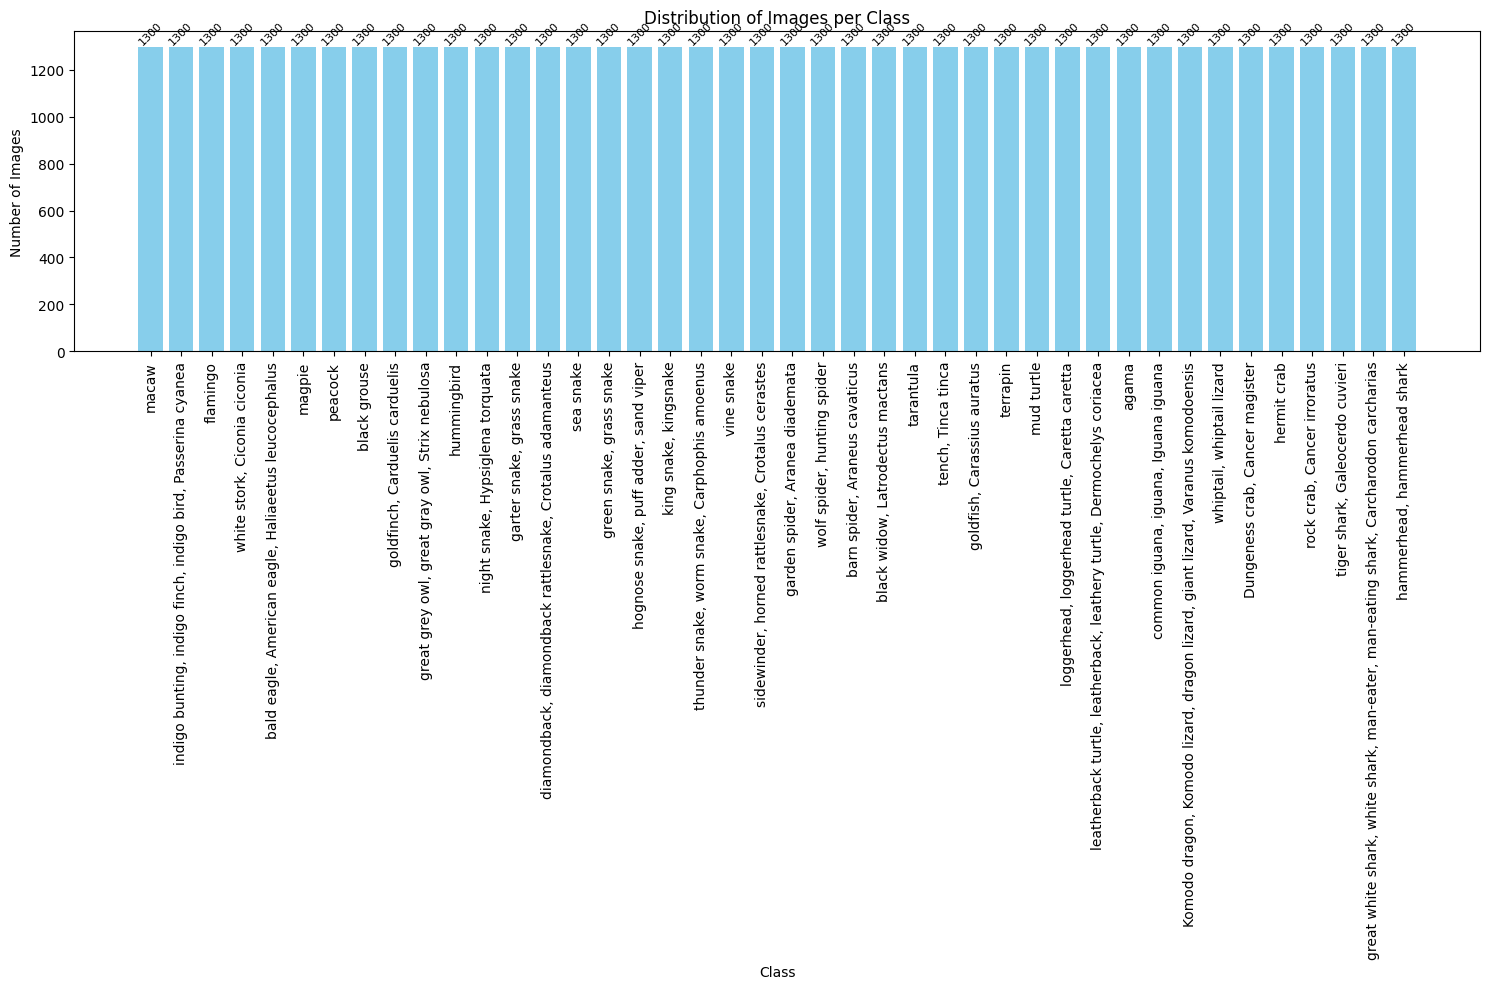

In [41]:
train_folders = ['train.X1', 'train.X2', 'train.X3', 'train.X4']

# Initialize an empty dictionary to store the mapping
class_to_train_folder = {}

# Function to list sub-folders in a given folder
def list_subfolders(input_folder_path):
    return {name for name in os.listdir(input_folder_path) if os.path.isdir(os.path.join(input_folder_path, name))}

# Iterate over each training folder
for train_folder in train_folders:
    folder_path = os.path.join(imagenet100_folder_path, train_folder)
    subfolders = list_subfolders(folder_path)

    # Update the dictionary with subfolder names as keys and the train folder as the value
    for subfolder in subfolders:
        class_to_train_folder[subfolder] = train_folder

# Initialize a dictionary to count images per class
images_per_class = {class_key: 0 for class_key in class_to_train_folder.keys()}

# Function to count images in a folder
def count_images(input_folder_path):
    return sum([len(files) for r, d, files in os.walk(input_folder_path)])

# Iterate over each class and its corresponding train folder
for class_key, train_folder in class_to_train_folder.items():
    folder_path = os.path.join(imagenet100_folder_path, train_folder, class_key)
    images_per_class[class_key] = count_images(folder_path)

# Data for plotting
class_names = [fine_grain_classes_dict[class_key] for class_key in fine_grain_classes_dict.keys()]
image_counts = [images_per_class[class_key] for class_key in fine_grain_classes_dict.keys()]


# Increase the figure width for better spacing and readability
plt.figure(figsize=(15, 10))  # Adjusted width from 10 to 15

bars = plt.bar(class_names, image_counts, color='skyblue', align='center')

# Setting the labels and title
plt.ylabel('Number of Images')
plt.xlabel('Class')
plt.title('Distribution of Images per Class')

# Rotating x-axis labels
plt.xticks(rotation=90)

# Adding a label with the exact count above each bar, with adjustments for better spacing and readability
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, str(yval), ha='center', va='bottom', fontsize=8, rotation=45)

plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels and text
plt.show()

In [42]:
from transformers import AutoImageProcessor, AutoModel
from PIL import Image
import requests

model_name = 'facebook/dinov2-large'
processor = AutoImageProcessor.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
last_hidden_states = outputs.last_hidden_state

preprocessor_config.json:   0%|          | 0.00/436 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/549 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

In [43]:
outputs

BaseModelOutputWithPooling(last_hidden_state=tensor([[[-2.2247, -2.0199,  0.5694,  ...,  1.3501,  0.9854, -0.8536],
         [ 1.3696,  2.1394,  3.7766,  ...,  1.5129,  1.5665, -1.2116],
         [ 1.1757,  2.2480,  3.4782,  ...,  1.0397,  1.7844, -0.6671],
         ...,
         [ 1.2036, -0.4892,  1.4572,  ...,  3.0594, -2.3957, -1.7161],
         [ 0.7375,  0.4865,  2.9933,  ...,  1.8425,  0.0235, -2.5123],
         [ 0.9626, -0.9952,  0.3169,  ...,  3.0985,  0.1993, -1.4676]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-2.2247, -2.0199,  0.5694,  ...,  1.3501,  0.9854, -0.8536]],
       grad_fn=<SliceBackward0>), hidden_states=None, attentions=None)

In [10]:
def convert_imagenet_hierarchy(filename):
  """
  Converts a file with ImageNet hierarchy structure to a dictionary.

  Args:
      filename: The path to the file containing the hierarchy.

  Returns:
      A dictionary where keys are coarse-grained classes and values are lists
      of fine-grained classes with their details.
  """
  imagenet_dict = {}
  current_class = None

  with open(filename, 'r') as f:
    for line in f:
      line = line.strip()
      if not line:
        continue

      # Check for coarse-grained class
      if line.endswith(':'):
        current_class = line[:-1]
      else:
        # Extract details for fine-grained class
        name, details = line.split("'", 1)
        name = name.rstrip(' (')
        details = details.rstrip(")")
        imagenet_dict[name] = current_class

  return imagenet_dict


In [11]:
imagenet_dict = convert_imagenet_hierarchy('Imagenet_hierachy.txt')

In [12]:
imagenet_dict

{'Macaw': 'Bird',
 'Indigo Bunting': 'Bird',
 'Flamingo': 'Bird',
 'White Stork': 'Bird',
 'Bald Eagle': 'Bird',
 'Magpie': 'Bird',
 'Peacock': 'Bird',
 'Black Grouse': 'Bird',
 'Goldfinch': 'Bird',
 'Great Grey Owl': 'Bird',
 'Hummingbird': 'Bird',
 'Snake1': 'Snake',
 'Snake2': 'Snake',
 'Snake3': 'Snake',
 'Snake4': 'Snake',
 'Snake5': 'Snake',
 'Snake6': 'Snake',
 'Snake7': 'Snake',
 'Snake8': 'Snake',
 'Snake9': 'Snake',
 'Snake10': 'Snake',
 'Garden Spider': 'Spider',
 'Wolf Spider': 'Spider',
 'Barn Spider': 'Spider',
 'Black Widow': 'Spider',
 'Tarantula': 'Spider',
 'Tench': 'Small Fish',
 'Goldfish': 'Small Fish',
 'Terrapin': 'Turtle',
 'Mud Turtle': 'Turtle',
 'Loggerhead Turtle': 'Turtle',
 'Leatherback Turtle': 'Turtle',
 'Agama': 'Lizard',
 'Common Iguana': 'Lizard',
 'Komodo Dragon': 'Lizard',
 'Whiptail Lizard': 'Lizard',
 'Dungeness Crab': 'Crab',
 'Hermit Crab': 'Crab',
 'Rock Crab': 'Crab',
 'Tiger Shark': 'Shark',
 'Great White Shark': 'Shark',
 'Hammerhead Shark':